# The Mathieu Equation

<p align="center">
  <img src="Mathieu.png" />
</p>

# Imports

In [39]:
import sympy as sp                                                          # For solving the equation
from sympy import sin, cos                                                  # Trig functions
from sympy.physics.mechanics import dynamicsymbols, LagrangesMethod         # For creating time-dependent functions and finding EoM
import matplotlib
from matplotlib.patches import Patch
import matplotlib.pyplot as plt                                             # For plotting
import numpy as np                                                          # For numerical solving

import panel as pn                                                          # For interactive animations

# Formulating the Equations of Motion

The first step in a mechanics problem is finding the position vector in terms of the generalized coordinates. From there, you can take the time derivative to find the generalized velocity vector (and from there find the kinetic energy). Sympy is nice in that it can find our equations of motion from the Lagrangian, but we'll need to define the Lagrangian first.

We'll start by creating a vector for our positional coordinates. The x-position of the mass can be determined using the angle $\phi$, via the standard polar relation $x=l\sin(\phi)$. (It's $\color{red}{\text{sin}}$ because the x-coordinate is opposite the rotational point of the pendulum.) However, for the y-coordinate, we have the vertical motion of the mass due to the oscillation of the pendulum AND due to the oscillation of the vertical platform. Thus, the y-coordinate is given by $y=l\cos(\phi) + A\cos(\omega t)$, where the first term is due to the *pendulum's* oscillation and the second term is due to the *ceiling's* oscillation.

For our constraints, we have $z=0$ as this is a two-dimensional problem. Also, we have the length of the pendulum as a constant. Thus, for our position vector we have
$$
\vec{r} = \langle x, y, z \rangle = \langle l\sin(\phi),\,l\cos(\phi) + A\cos(\omega t),\, 0 \rangle
$$
where $\phi$ is a function of time.

Given this as our starting point, we can actually code the rest, all the way to our equations of motion!

In [2]:
# Creating phi(t)
phi = dynamicsymbols('phi')
# Creating the other symbols (space delimited)
l, omega, A, t, m, g = sp.symbols('l omega A t m g')

# Initializing the position vector
x = l*sin(phi)
y = l*cos(phi) + A*cos(omega * t)
z = 0
r = sp.Matrix([x, y, z])
r

Matrix([
[                 l*sin(phi(t))],
[A*cos(omega*t) + l*cos(phi(t))],
[                             0]])

In [3]:
# Taking the time derivative
rdot = sp.diff(r, t)
rdot

Matrix([
[                        l*cos(phi(t))*Derivative(phi(t), t)],
[-A*omega*sin(omega*t) - l*sin(phi(t))*Derivative(phi(t), t)],
[                                                          0]])

In [4]:
# Formulating the Lagrangian
v_squared = rdot.dot(rdot)
# Kinetic energy
T = 1/2 * m * v_squared
# Potential energy
U = m * g * r[1]
# Lagrangian formulation
L = T - U

LM = LagrangesMethod(L, [phi])
# Printing the Lagrangian
sp.simplify(L)

m*(-g*(A*cos(omega*t) + l*cos(phi(t))) + 0.5*l**2*cos(phi(t))**2*Derivative(phi(t), t)**2 + 0.5*(A*omega*sin(omega*t) + l*sin(phi(t))*Derivative(phi(t), t))**2)

In [5]:
# Deriving the Equation of Motion
EoM = LM.form_lagranges_equations()[0]
EoM = sp.simplify(EoM)
EoM

l*m*(A*omega**2*sin(phi(t))*cos(omega*t) - g*sin(phi(t)) + l*Derivative(phi(t), (t, 2)))

In [6]:
# Small angle approximation:
EoM = EoM.subs(sin(phi), phi)
EoM

l*m*(A*omega**2*phi(t)*cos(omega*t) - g*phi(t) + l*Derivative(phi(t), (t, 2)))

# Analyzing the Test Cases

Now we have several test cases we need to examine: specifically, $$\omega_1 = \sqrt{\frac{g}{l}}, \; \omega_2 = 2\sqrt{\frac{g}{l}}, \; \omega_3 = 3\sqrt{\frac{g}{l}}.$$ The first two are supposed to indicate an upsurge while the final case is to show that the only stable points for the system are $A \leq 5 \frac{l}{18}$. Let's tackle these in two different parts.

## Part A: The Upsurge

The differential equation we have arrived at is known as ***Mathieu's Equation***, and has been well-studied over the centuries. Thus, we can rely on the results of other hard-woring mathematicians. Thanks to Gaston Floquet, we know a few things about this equation that will help us determine whether an upsurge will happen.

According to Floquet's theorem, solutions to the Mathieu equation will either converge to zero or diverge to infinity. [[1](https://en.wikipedia.org/wiki/Mathieu_function)][[2](https://en.wikipedia.org/wiki/Floquet_theory)] Thus, with the results of the Mathieu equation, there are regions of stability (converging to zero) or instability (diverging to infinity). The way we can know which regions are stable and which are not is by using an Ince-Strutt diagram. This diagram shows 5 curves, and the regions bounded by these curves determines the unstable regions. We can actually plot the curves here because, thankfully, a physicist from St. Petersburg, Dr. Eugene Butikov, determined the analytical solutions to them not too long ago [[3](https://pubs.aip.org/aapt/ajp/article/86/4/257/1057663/Analytical-expressions-for-stability-regions-in)].

To utilize these results, we first need to slightly adjust the form of our differential equation. The form used for the curves derived by Butikov is
$$
\frac{d^2u}{dt^2} + k\left(1 - m\cos{t} \right)u = 0.
$$
Making our solution match this form yields
$$
\ddot{\phi} - \frac{g}{l}\left[1 - \frac{A\omega^2}{g}\cos{\omega t} \right]\phi = 0
$$
showing
$$
k = -\frac{g}{l}, \: m = \frac{A\omega^2}{g}.
$$

Now, the analytic curves on the Ince-Strutt diagram are determined to be
$$
m(k) = \begin{cases}
2\sqrt{\frac{k(k-1)(k-4)}{3k-8}}, & k < 0,\\
\frac{1}{4}\left(\sqrt{(9-4k)(13-20k)}-(9-4k) \right),  &  k < \frac{1}{4},\\
\frac{1}{4}\left(9-4k-\sqrt{(9-4k)(13-20k)} \right),  & \frac{1}{4} < k < \frac{13}{20},\\
\sqrt{\frac{2(k-1)(k-4)(k-9)}{k-5}}, & \frac{13}{20} < k < 1,\\
2\sqrt{\frac{k(k-1)(k-4)}{3k-8}}, & k > 1
\end{cases}
$$
Knowing this, we can actually plot this diagram to get a good idea of what it looks like.

In [30]:
# Defining k
k = np.linspace(-1, 1.5, 400)

# Defining the boundary curves
curve1 = np.piecewise(k, [k<0, k>=0], [lambda k: 2 * np.sqrt(k*(k-1)*(k-4) / (3*k - 8)), 0])                                               # k < 0
curve2 = np.piecewise(k, [k<0.25, k>=0.25], [lambda k: 1/4 * (np.sqrt((9 - 4*k)*(13 - 20*k)) - (9 - 4*k)), 0])                             # k < 1/4
curve3 = np.piecewise(k, [(k > 1/4) & (k<13/20), (k<=1/4) | (k>=13/20)], [lambda k: 1/4 * (9 - 4*k - np.sqrt((9 - 4*k)*(13 - 20*k))), 0])  # 1/4 < k < 13/20
curve4 = np.piecewise(k, [(k > 13/20) & (k<1), (k<=13/20) | (k>=1)], [lambda k: np.sqrt(2 * (k - 1) * (k - 4) * (k - 9) / (k - 5)), 0])    # 13/20 < k < 1
curve5 = np.piecewise(k, [k>1, k<=1], [lambda k: 2 * np.sqrt(k * (k - 1) * (k - 4) / (3*k -8)), 0])                                        # k > 1

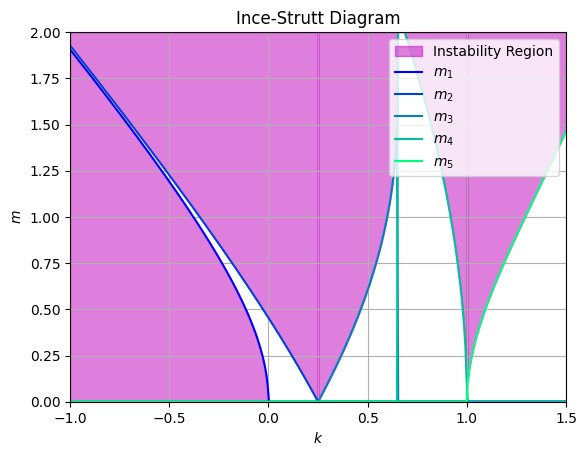

In [43]:
# Getting a colormap
cmap = matplotlib.colormaps['winter']

# Getting line colors for each line
colors = [cmap(i/4) for i in range(5)]

# Defining the plot/curves
fig, ax = plt.subplots()
ax.plot(k, curve1, color=colors[0], label='$m_1$')
ax.plot(k, curve2, color=colors[1], label='$m_2$')
ax.plot(k, curve3, color=colors[2], label='$m_3$')
ax.plot(k, curve4, color=colors[3], label='$m_4$')
ax.plot(k, curve5, color=colors[4], label='$m_5$')

# Filling between curves
ax.fill_between(k, curve1, color='m', alpha=0.5)
ax.fill_between(k, curve2, 2, where=(k < 1/4), color='m', alpha=0.5)
ax.fill_between(k, curve3, 2, where=((k<13/20) & (k>=1/4)), color='m', alpha=0.5)
ax.fill_between(k, curve4, 2, where=((k<1) & (k>13/20)), color='m', alpha=0.5)
ax.fill_between(k, curve5, 2, where=(k>1), color='m', alpha=0.5)

# Adding shaded region to legend
shade = Patch(color='m', alpha=0.5, label='Instability Region')
ax.legend(handles=[shade, *ax.get_lines()], loc='upper right')

# Plot configuration
ax.set_xlim(-1, 1.5)
ax.set_ylim(0, 2)
ax.set_xlabel('$k$')
ax.set_ylabel('$m$')
ax.set_title('Ince-Strutt Diagram')
ax.grid(True)


plt.show()

Now that we've shown the regions of instability, all we have to do is figure out where our particular solution lies on this graph. We are given two cases: $\omega_1 = \sqrt{\frac{g}{l}}$ and $\omega_2 = 2\sqrt{\frac{g}{l}}$. With this, our values of $m$ become
$$
m_1 = \frac{A}{l}, \: m_2 = \frac{4A}{l}
$$
while our value for k remains $k=-\frac{g}{l}$. Using this, we can plot our particular case on the stability diagram.

However, we need to choose a value for $A$. $A$ will be some positive scaling factor corresponding to the amplitude of oscillation for the pivot point of the pendulum. As our value of $k$ is negative, we can presume that the solution will likely diverge to infinity (though there is a small region of stability). What we can do to account for this is generate a vertical line at our value of $k$ corresponding to all the different values of A that could be chosen.

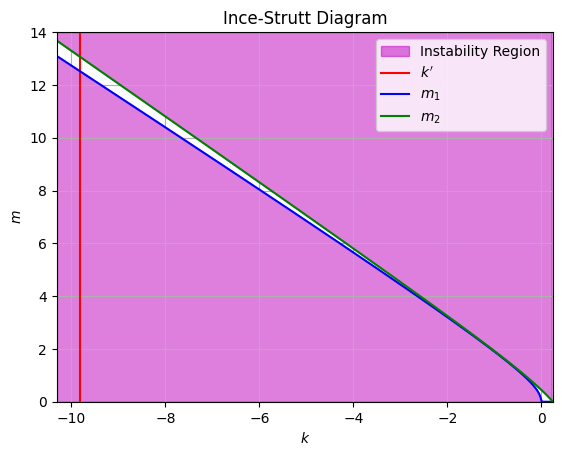

In [52]:
# Defining constants
g = 9.81
l = 1
k_prime = -g/l

# Preparing vertical line at k_prime
k = np.linspace(k_prime - 0.5, 0.25, 400)
k_prime_y = [0, 14]
k_prime_x = [k_prime, k_prime]

# Defining the boundary curves
curve1 = np.piecewise(k, [k<0, k>=0], [lambda k: 2 * np.sqrt(k*(k-1)*(k-4) / (3*k - 8)), 0])                                               # k < 0
curve2 = np.piecewise(k, [k<0.25, k>=0.25], [lambda k: 1/4 * (np.sqrt((9 - 4*k)*(13 - 20*k)) - (9 - 4*k)), 0])                             # k < 1/4

# Defining the plot/curves
fig, ax = plt.subplots()
ax.plot(k_prime_x, k_prime_y, color='red', label="$k'$")
ax.plot(k, curve1, color='blue', label='$m_1$')
ax.plot(k, curve2, color='green', label='$m_2$')

# Filling between curves
ax.fill_between(k, curve1, color='m', alpha=0.5)
ax.fill_between(k, curve2, 14, where=(k < 1/4), color='m', alpha=0.5)

# Adding shaded region to legend
shade = Patch(color='m', alpha=0.5, label='Instability Region')
ax.legend(handles=[shade, *ax.get_lines()], loc='upper right')

# Plot configuration
ax.set_xlim(k_prime - 0.5, 0.25)
ax.set_ylim(0, 14)
ax.set_xlabel('$k$')
ax.set_ylabel('$m$')
ax.set_title('Ince-Strutt Diagram')
ax.grid(True)

plt.show()

In [70]:
# Redefining symbols in sympy
m1, m2 = sp.symbols('m_1 m_2')
g, l, A, omega = sp.symbols('g l A omega')
k = -g/l

# Defining curves in sympy
sp_curve1 = sp.Eq(m1, 2*sp.sqrt(k*(k-1)*(k-4)/(3*k-8)))
sp_curve2 = sp.Eq(m2, 1/4 * (sp.sqrt((9-4*k)*(13-20*k)) - (9-4*k)))

# Solving for the amplitude
m = A/l
A1 = sp.solve(sp_curve1.subs(m1, m), A)[0]
A2 = sp.solve(sp_curve2.subs(m2, m), A)[0]

A1

2*l*sqrt(g*(g**2 + 5*g*l + 4*l**2)/(l**2*(3*g + 8*l)))

In [71]:
A2

-g + 3.80788655293195*l*sqrt(0.344827586206897*g**2/l**2 + g/l + 0.504310344827586) - 2.25*l

In [72]:
print(f' Minimum Amplitude: {A1.subs(g, 9.81).subs(l, 1)}\n',f'Maximum Amplitude: {A2.subs(g, 9.81).subs(l, 1)}')

 Minimum Amplitude: 12.5102005550190
 Maximum Amplitude: 13.0544978050528


Thus, for $\omega_1 = \sqrt{\frac{g}{l}}$, the minimum amplitude for stable motion is $A=12.5 \text{m}$ and the maximum is $13.1 \text{m}$. However, the initial condition given in the problem was that $A<<1$, so this pendulum will experience unstable motion (i.e., an upswing).


Now, for $\omega_2 = 2\sqrt{\frac{g}{l}}$:

In [73]:
# Solving for the amplitude
m = 4*A/l
A1 = sp.solve(sp_curve1.subs(m1, m), A)[0]
A2 = sp.solve(sp_curve2.subs(m2, m), A)[0]

A1

l*sqrt(g*(g**2 + 5*g*l + 4*l**2)/(l**2*(3*g + 8*l)))/2

In [74]:
A2

-0.25*g + 0.951971638232989*l*sqrt(0.344827586206897*g**2/l**2 + g/l + 0.504310344827586) - 0.5625*l

In [75]:
print(f' Minimum Amplitude: {A1.subs(g, 9.81).subs(l, 1)}\n',f'Maximum Amplitude: {A2.subs(g, 9.81).subs(l, 1)}')

 Minimum Amplitude: 3.12755013875474
 Maximum Amplitude: 3.26362445126319


Thus, for $\omega_2 = 2\sqrt{\frac{g}{l}}$, the minimum amplitude for stable motion is $A=3.1 \text{m}$ and the maximum is $3.2 \text{m}$. However, like the first frequency given, the initial condition given in the problem was that $A<<1$, so this pendulum will experience unstable motion (i.e., an upswing).


Now, for $\omega_3 = 3\sqrt{\frac{g}{l}}$:

In [63]:
# Solving for the amplitude
m = 9*A/l
A1 = sp.solve(sp_curve1.subs(m1, m), A)[0]
A2 = sp.solve(sp_curve2.subs(m2, m), A)[0]

A1

2*l*sqrt(g*(g**2 + 5*g*l + 4*l**2)/(l**2*(3*g + 8*l)))/9

In [64]:
A2

-0.111111111111111*g + 0.423098505881328*l*sqrt(0.344827586206897*g**2/l**2 + g/l + 0.504310344827586) - 0.25*l

In [67]:
print(f' Minimum Amplitude: {A1.subs(g, 9.81).subs(l, 1)}\n',f'Maximum Amplitude: {A2.subs(g, 9.81).subs(l, 1)}')

 Minimum Amplitude: 1.39002228389100
 Maximum Amplitude: 1.45049975611697


## Part B: Stable Amplitudes


# Animating the Scenario

The goal of this simulation is to not just make the pendulum animated, but *interactive*. 

In [ ]:
# Defining the EoM numerically
def ODE(t, S, A, omega, g, l):
    phi, phi_dot = S
    S_dot = [phi_dot, 
             g/l * (1 - A*omega**2/g * np.cos(omega * t))*phi]
    return S_dot